AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [13]:
import pandas as pd

# 1. Import the Titanic dataset using pandas
titanic_data = pd.read_csv('titanic.csv')

# 2. Create a Dataframe from the dataset
df = pd.DataFrame(titanic_data)

# 3. Print the first 10 rows of the dataset
print("First 10 rows:")
print(df.head(10))

# 4. Print the last 20 rows of the dataset
print("\nLast 20 rows:")
print(df.tail(20))

# 5. Print dataset's information
print("\nDataset information:")
print(df.info())

# 6. Describe the dataset
print("\nDataset description:")
print(df.describe())

First 10 rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


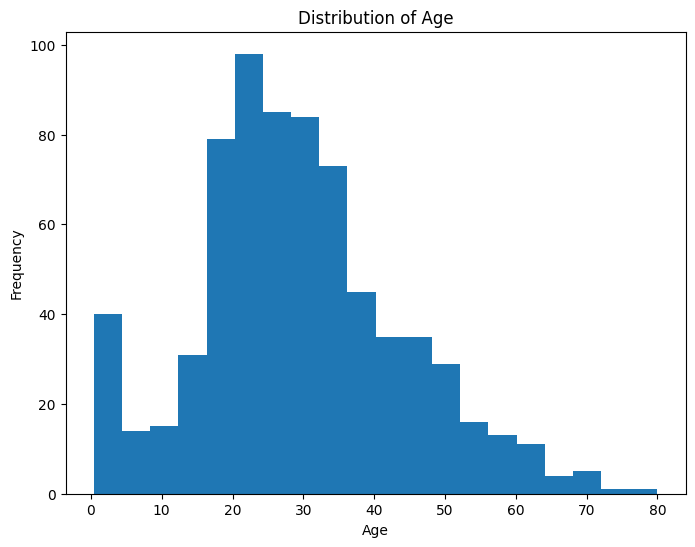


Cleaned DataFrame:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic.csv')
df = pd.DataFrame(titanic_data)

# 1. Find out how many missing values there are in the dataset
print("Missing Values:")
print(df.isnull().sum())

# 2. For the 'Age' column:
# 2.1. Plot the distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 2.2. Fill missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3. For the 'Cabin' column:
try:
    df.drop('Cabin', axis=1, inplace=True)
except KeyError:
    print("'Cabin' column not found, skipping.")

# 4. For the 'Embarked' column:
embarked_mode = df['Embarked'].mode()
if len(embarked_mode) > 0:
    df['Embarked'].fillna(embarked_mode[0], inplace=True)
else:
    print("No mode found for 'Embarked' column, skipping filling.")

# 5. For the 'Survived' column:
df['Survived'] = df['Survived'].replace({'Zero': 0, 'One': 1})

# 6. For the 'Fare' column:
df['Fare'] = df['Fare'].str.replace('$', '', regex=False).astype(float)

print("\nCleaned DataFrame:")
print(df.head())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average fare by Pclass:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


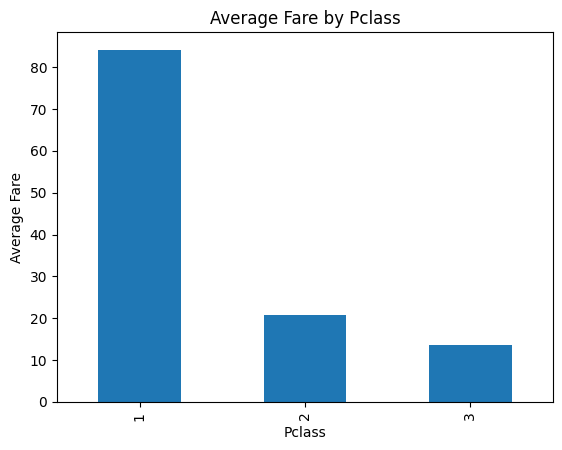


Average fare by Sex:
Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


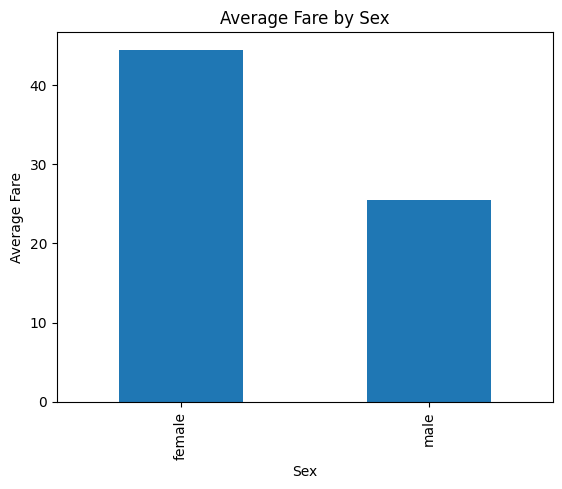

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Find out the average fare grouped by Pclass
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average fare by Pclass:")
print(average_fare_by_pclass)

# 1.1. Plot the above using a suitable plot
average_fare_by_pclass.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare by Pclass')
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("\nAverage fare by Sex:")
print(average_fare_by_sex)

# 2.1. Plot the above using a suitable plot
average_fare_by_sex.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.title('Average Fare by Sex')
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

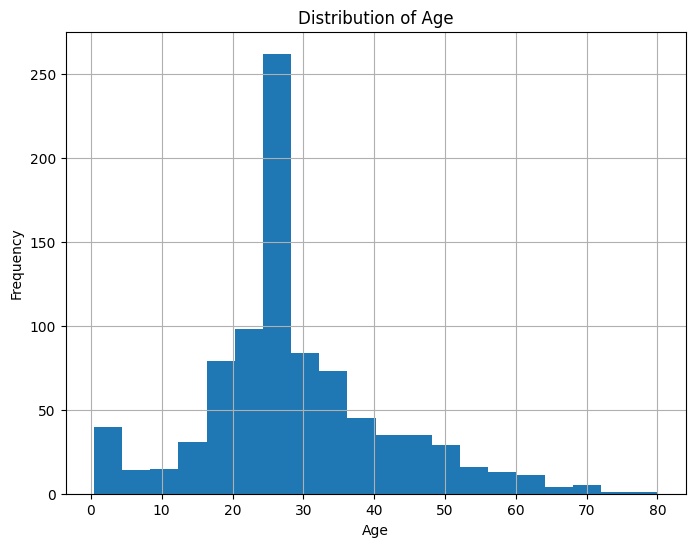

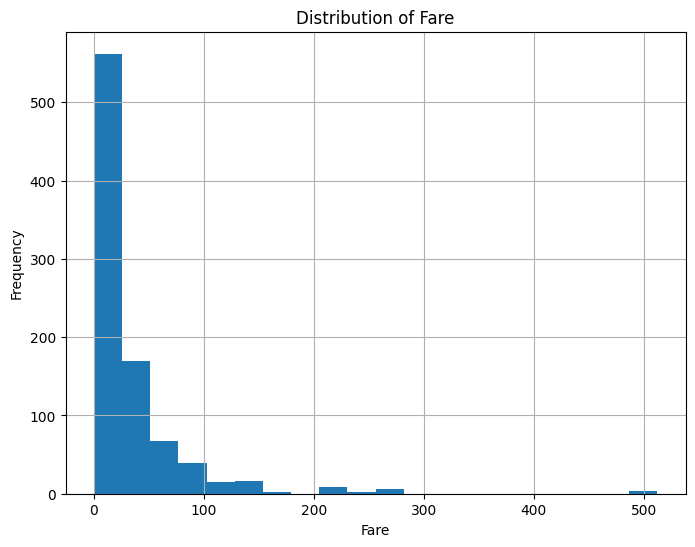

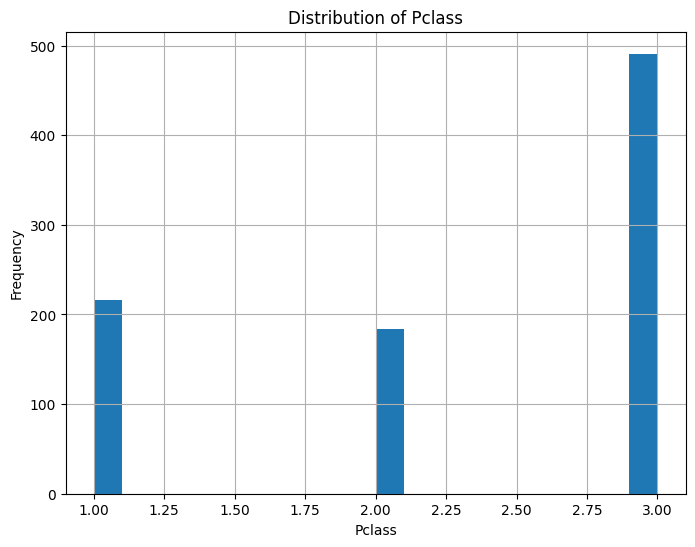

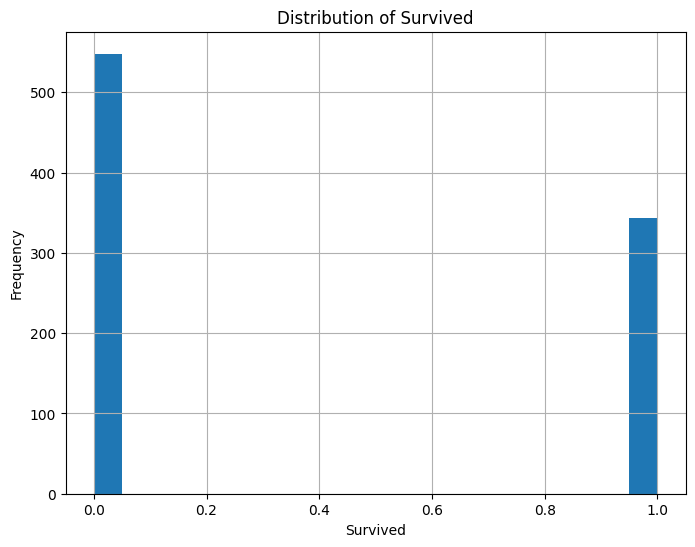

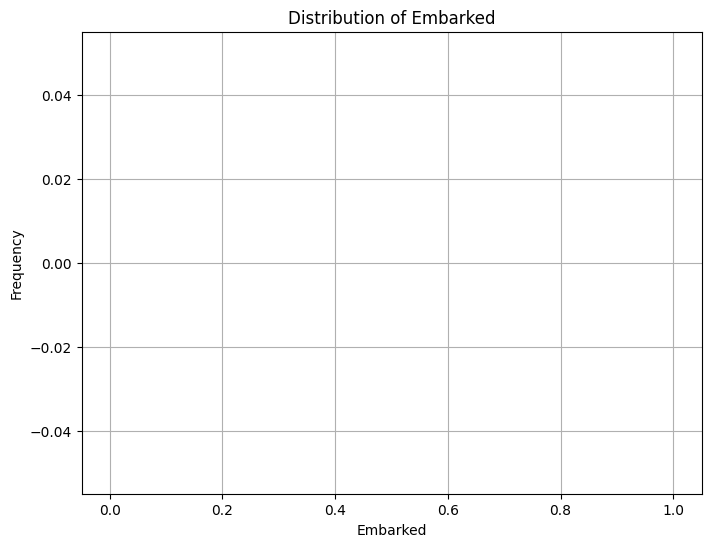

<Figure size 800x600 with 0 Axes>

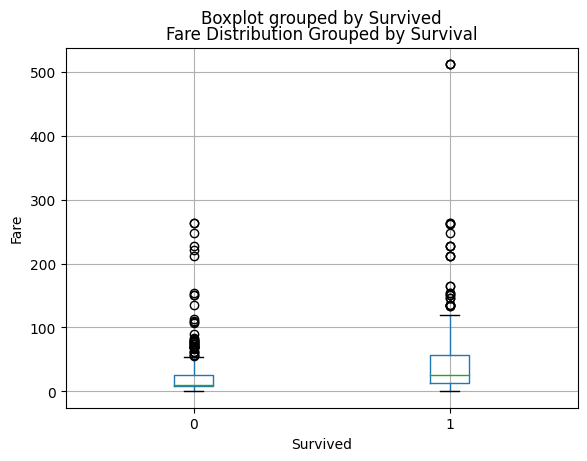

<Figure size 800x600 with 0 Axes>

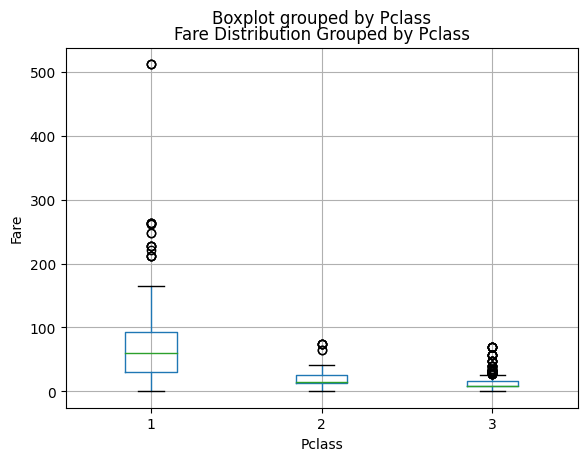

<Figure size 800x600 with 0 Axes>

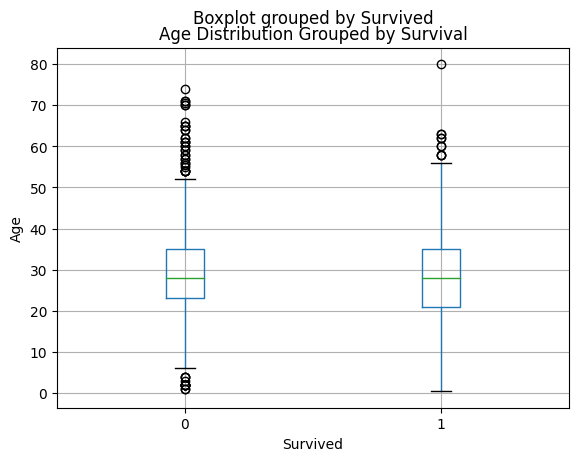

<Figure size 800x600 with 0 Axes>

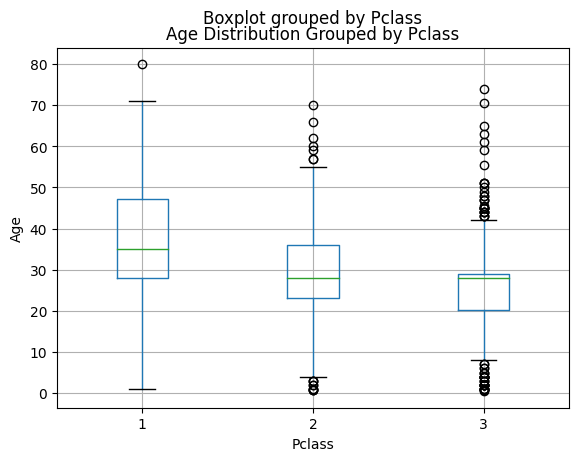

<Figure size 800x600 with 0 Axes>

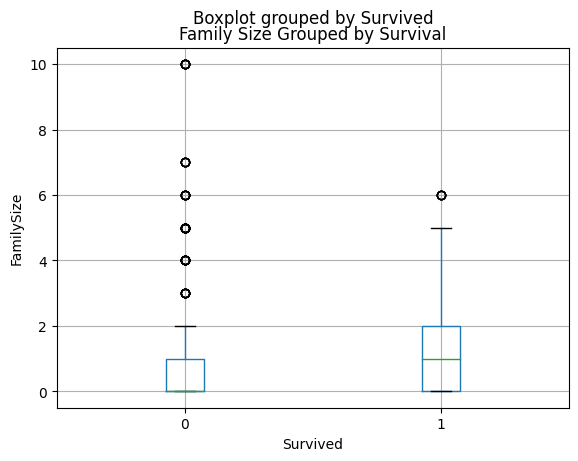

<Figure size 800x600 with 0 Axes>

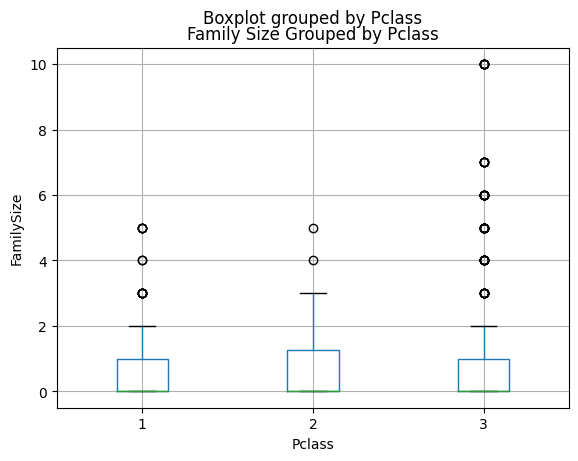

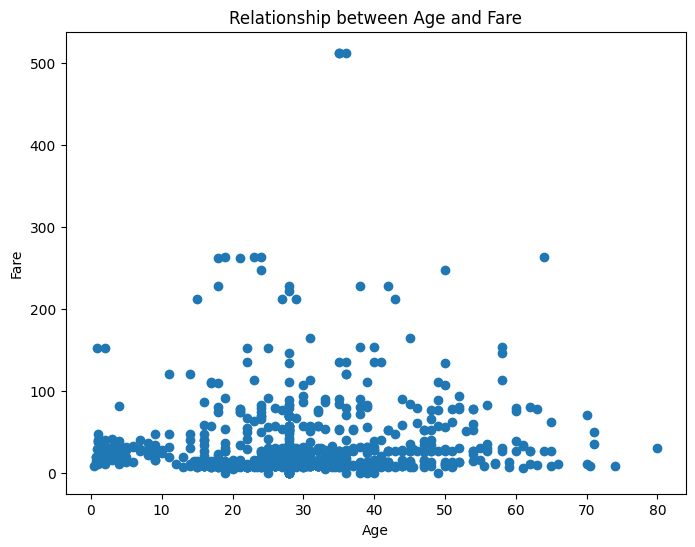

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting functions for different variables
def plot_distribution(data, column, title):
    plt.figure(figsize=(8, 6))
    # Convert column to numeric if it's not
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column].hist(bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

def plot_grouped_distribution(data, column, group, title):
    plt.figure(figsize=(8, 6))
    # Convert columns to numeric if they're not
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')
    if data[group].dtype == 'object':
        data[group] = pd.to_numeric(data[group], errors='coerce')
    data.boxplot(column=column, by=group)
    plt.xlabel(group)
    plt.ylabel(column)
    plt.title(title)
    plt.show()

plot_distribution(df, 'Age', 'Distribution of Age')
plot_distribution(df, 'Fare', 'Distribution of Fare')
plot_distribution(df, 'Pclass', 'Distribution of Pclass')
plot_distribution(df, 'Survived', 'Distribution of Survived')
plot_distribution(df, 'Embarked', 'Distribution of Embarked')

plot_grouped_distribution(df, 'Fare', 'Survived', 'Fare Distribution Grouped by Survival')
plot_grouped_distribution(df, 'Fare', 'Pclass', 'Fare Distribution Grouped by Pclass')
plot_grouped_distribution(df, 'Age', 'Survived', 'Age Distribution Grouped by Survival')
plot_grouped_distribution(df, 'Age', 'Pclass', 'Age Distribution Grouped by Pclass')

# Combine SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']
plot_grouped_distribution(df, 'FamilySize', 'Survived', 'Family Size Grouped by Survival')
plot_grouped_distribution(df, 'FamilySize', 'Pclass', 'Family Size Grouped by Pclass')

# Scatter plot for Age and Fare
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare')
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [28]:
import pandas as pd

# Convert all object columns to numeric for correlation calculation
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Generate a correlation matrix for the entire dataset
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# 2. Find correlation between 'Age' and 'Fare'
print("\nCorrelation between Age and Fare:", df['Age'].corr(df['Fare']))



Correlation Matrix:
             PassengerId  Survived    Pclass  Name  Sex       Age     SibSp  \
PassengerId     1.000000 -0.003524 -0.035144   NaN  NaN  0.034212 -0.057527   
Survived       -0.003524  1.000000 -0.336387   NaN  NaN -0.063166 -0.034305   
Pclass         -0.035144 -0.336387  1.000000   NaN  NaN -0.339898  0.083081   
Name                 NaN       NaN       NaN   NaN  NaN       NaN       NaN   
Sex                  NaN       NaN       NaN   NaN  NaN       NaN       NaN   
Age             0.034212 -0.063166 -0.339898   NaN  NaN  1.000000 -0.233296   
SibSp          -0.057527 -0.034305  0.083081   NaN  NaN -0.233296  1.000000   
Parch          -0.001652  0.094808  0.018443   NaN  NaN -0.172482  0.414838   
Ticket         -0.076043 -0.121801  0.275151   NaN  NaN -0.143537  0.269342   
Fare            0.012658  0.257122 -0.549500   NaN  NaN  0.096688  0.159651   
Embarked             NaN       NaN       NaN   NaN  NaN       NaN       NaN   
FamilySize     -0.040143  0.0239